## Imports

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the data

* There are two datasets
* diamonds.csv contains the data used to build the regression model
* new-diamonds.csv contains the data for the diamonds the company would like to purchase. 
* Both datasets contain carat, cut, and clarity data for each diamond. Only the diamonds.csv dataset has prices. We'll be predicting prices for the new_diamonds.csv dataset.

In [69]:
diamonds = pd.read_csv("diamonds.csv", index_col=0)
new_diamonds = pd.read_csv("new-diamonds.csv", index_col=0)

#### Check the head and info of diamonds & new_diamonds Dataframe

In [70]:
diamonds.head(10)

,carat,cut,cut_ord,color,clarity,clarity_ord,price
1,0.51,Premium,4,F,VS1,4,1749
2,2.25,Fair,1,G,I1,1,7069
3,0.70,Very Good,3,E,VS2,5,2757
4,0.47,Good,2,F,VS1,4,1243
5,0.30,Ideal,5,G,VVS1,7,789
6,0.33,Ideal,5,D,SI1,3,728
7,2.01,Very Good,3,G,SI1,3,18398
8,0.51,Ideal,5,F,VVS2,6,2203
9,1.70,Premium,4,D,SI1,3,15100
10,0.53,Premium,4,D,VS2,5,1857


In [71]:
new_diamonds.head(10)

,carat,cut,cut_ord,color,clarity,clarity_ord
1,1.22,Premium,4,G,SI1,3
2,1.01,Good,2,G,VS2,5
3,0.71,Very Good,3,I,VS2,5
4,1.01,Ideal,5,D,SI2,2
5,0.27,Ideal,5,H,VVS2,6
6,0.52,Premium,4,G,VS1,4
7,1.01,Premium,4,F,SI1,3
8,0.59,Ideal,5,D,SI1,3
9,1.01,Good,2,E,SI1,3
10,2.03,Ideal,5,F,SI2,2


In [72]:
new_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        3000 non-null   float64
 1   cut          3000 non-null   object 
 2   cut_ord      3000 non-null   int64  
 3   color        3000 non-null   object 
 4   clarity      3000 non-null   object 
 5   clarity_ord  3000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 128.9+ KB


In [73]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        50000 non-null  float64
 1   cut          50000 non-null  object 
 2   cut_ord      50000 non-null  int64  
 3   color        50000 non-null  object 
 4   clarity      50000 non-null  object 
 5   clarity_ord  50000 non-null  int64  
 6   price        50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.5+ MB


## Exploratory Data Analysis
#### Let's explore the data

##### Using seaborn to create a jointplot to see if there's correlation between carat and price


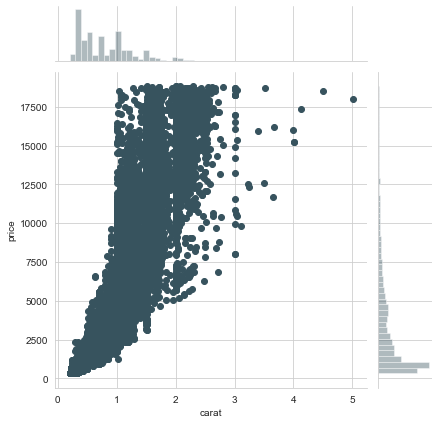

In [94]:
sns.jointplot(x = "carat", y = "price", data = diamonds)

### Let's explore these types of relationship accross the entire dataset using sns.pairplot

*Based off the plot, most correlated feature with our target is carat.

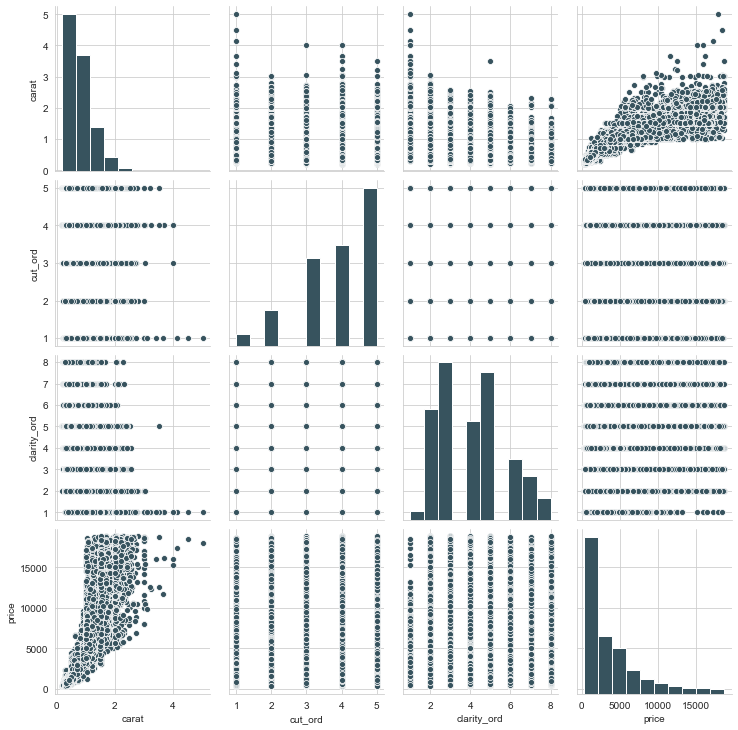

In [76]:
sns.pairplot(diamonds)

#### Convert categorical variable into dummy/indicator variables

In [77]:
diamonds = pd.get_dummies(diamonds, columns=['cut', 'color','clarity'])
new_diamonds = pd.get_dummies(new_diamonds, columns=['cut', 'color','clarity'])

In [78]:
diamonds.head()

,carat,cut_ord,clarity_ord,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.51,4,4,1749,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2.25,1,1,7069,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.70,3,5,2757,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.47,2,4,1243,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0.30,5,7,789,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
new_diamonds.head()

,carat,cut_ord,clarity_ord,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,1.22,4,3,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.01,2,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.71,3,5,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1.01,5,2,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,0.27,5,6,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Training the Data
* The DataFrame Diamonds is our training data



In [80]:
#Target Variable

Y = diamonds.price

In [81]:
#Predictor Variables

X = diamonds.drop("price", axis=1)

#### Import LinearRegression from sklearn.linear_model

In [82]:
from sklearn import linear_model

#### **Create an instance of a LinearRegression() model named model.**

In [83]:
model = linear_model.LinearRegression()

#### Train/Fit model on the training data

In [84]:
model.fit(X,Y)

LinearRegression()

#### Print Out the coefficients of the model
A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

In [93]:
coeffecients = pd.DataFrame(model.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
carat,8.887104e+03
cut_ord,-1.527590e+14
clarity_ord,1.077862e+14
cut_Fair,-1.008780e+15
cut_Good,-8.560212e+14
cut_Ideal,-3.977440e+14
cut_Premium,-5.505031e+14
cut_Very Good,-7.032621e+14
color_D,9.068522e+14
color_E,9.068522e+14


### Predicting Price of the new_diamonds Data.


In [86]:
Y_pred = model.predict(new_diamonds)

##### Calculating the bid price, to come up with a bid price, we multiply this bid by 70%, since the company targets purchases the diamonds at 70% of retail value

In [87]:
#calculating the bid

bid = 0.7 * sum(Y_pred)

In [88]:
print('%.2f' % bid)

8229680.72


## Bid Recommendation

$8,229,680.72 would be my recommended bid price for the 3000 diamonds.